In [1]:
using Revise
using Pkg

ENV["PYTHON"] = Sys.which("python")
ENV["PYCALL_JL_RUNTIME_PYTHON"] = Sys.which("python")
Pkg.build("PyCall")
using FileIO
using JLD2
include("../src/DistributionallyRobust.jl")
using .DistributionallyRobust

    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/e32a90da027ca45d84678b826fffd3110bb3fc90/build.log`


    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/62f417f6ad727987c755549e9cd88c46578da562/build.log`


┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /home/kh-ryu/DRC_Project/DRC_Trajectron/Manifest.toml:0


┌ Info: Number of Julia Thread(s): 1
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/DistributionallyRobust.jl:39
┌ Info: CUDA Device: NVIDIA GeForce RTX 3060
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/DistributionallyRobust.jl:40


┌ Info: Python executable used by PyCall: /home/kh-ryu/anaconda3/envs/trajectron++/bin/python
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/DistributionallyRobust.jl:41


In [2]:
include("$(@__DIR__)/../scripts/default_params/params_drc_data_trajectron.jl");

include("$(@__DIR__)/../scripts/parameter_setup_drc.jl");

In [3]:
scene_loader, controller, w_init, measurement_schedule, target_speed =
    controller_setup(scene_param,
                    predictor_param,
                    prediction_device=prediction_device,
                    cost_param=cost_param,
                    cnt_param=cnt_param,
                    dtc=dtc,
                    ego_pos_init_vec=ego_pos_init_vec,
                    ego_pos_goal_vec=ego_pos_goal_vec,
                    sim_horizon=sim_horizon,
                    verbose=true);

Scene Mode: data
Prediction Mode: trajectron
Deterministic Prediction: false
Loaded evaluation data from /home/kh-ryu/DRC_Project/DRC_Trajectron/Trajectron-plus-plus/experiments/processed/eth_test.pkl
Looking at the eth_test.pkl sequence, data_id 0, start_idx 905


Loaded Trajectron model from /home/kh-ryu/DRC_Project/DRC_Trajectron/Trajectron-plus-plus/experiments/pedestrians/models/eth_attention_radius_3/model_registrar-100.pt


In [4]:
result, ~, ~ = evaluate(scene_loader, controller, w_init, ego_pos_goal_vec,
                  measurement_schedule);

┌ Warning: Time 0.00 [sec]: DRC computation took 0.378 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191


┌ Warning: Time 0.00 [sec]: This evaluation iteration took 0.06 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 0.10 [sec]: DRC computation took 0.313 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 0.10 [sec]: This evaluation iteration took 0.313 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 0.20 [sec]: DRC computation took 0.303 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 0.20 [sec]: This evaluation iteration took 0.303 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 0.30 [sec]: DRC computation took 0.3 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 0.30 [sec]: This evaluation iteration took 0.301 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 0.40 [sec]: DRC computation took 0.306 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 0.40 [sec]: This evaluation iteration took 0.367 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 0.50 [sec]: DRC computation took 0.281 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 0.50 [sec]: This evaluation iteration took 0.281 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 0.60 [sec]: DRC computation took 0.298 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 0.60 [sec]: This evaluation iteration took 0.298 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 0.70 [sec]: DRC computation took 0.297 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 0.70 [sec]: This evaluation iteration took 0.297 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 0.80 [sec]: DRC computation took 0.292 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 0.80 [sec]: This evaluation iteration took 0.35 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 0.90 [sec]: DRC computation took 0.295 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 0.90 [sec]: This evaluation iteration took 0.295 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 1.00 [sec]: DRC computation took 0.278 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 1.00 [sec]: This evaluation iteration took 0.279 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 1.10 [sec]: DRC computation took 0.297 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 1.10 [sec]: This evaluation iteration took 0.297 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 1.20 [sec]: DRC computation took 0.297 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 1.20 [sec]: This evaluation iteration took 0.353 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 1.30 [sec]: DRC computation took 0.296 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 1.30 [sec]: This evaluation iteration took 0.296 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 1.40 [sec]: DRC computation took 0.311 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 1.40 [sec]: This evaluation iteration took 0.311 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 1.50 [sec]: DRC computation took 0.295 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 1.50 [sec]: This evaluation iteration took 0.296 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 1.60 [sec]: DRC computation took 0.314 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 1.60 [sec]: This evaluation iteration took 0.381 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 1.70 [sec]: DRC computation took 0.31 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 1.70 [sec]: This evaluation iteration took 0.31 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 1.80 [sec]: DRC computation took 0.312 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 1.80 [sec]: This evaluation iteration took 0.312 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 1.90 [sec]: DRC computation took 0.307 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 1.90 [sec]: This evaluation iteration took 0.308 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 2.00 [sec]: DRC computation took 0.303 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 2.00 [sec]: This evaluation iteration took 0.369 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 2.10 [sec]: DRC computation took 0.291 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 2.10 [sec]: This evaluation iteration took 0.291 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 2.20 [sec]: DRC computation took 0.304 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 2.20 [sec]: This evaluation iteration took 0.304 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 2.30 [sec]: DRC computation took 0.303 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 2.30 [sec]: This evaluation iteration took 0.303 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 2.40 [sec]: DRC computation took 0.302 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 2.40 [sec]: This evaluation iteration took 0.366 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 2.50 [sec]: DRC computation took 0.303 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 2.50 [sec]: This evaluation iteration took 0.303 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 2.60 [sec]: DRC computation took 0.31 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 2.60 [sec]: This evaluation iteration took 0.31 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 2.70 [sec]: DRC computation took 0.31 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 2.70 [sec]: This evaluation iteration took 0.31 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 2.80 [sec]: DRC computation took 0.28 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 2.80 [sec]: This evaluation iteration took 0.337 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 2.90 [sec]: DRC computation took 0.307 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 2.90 [sec]: This evaluation iteration took 0.307 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 3.00 [sec]: DRC computation took 0.304 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 3.00 [sec]: This evaluation iteration took 0.304 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 3.10 [sec]: DRC computation took 0.304 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 3.10 [sec]: This evaluation iteration took 0.305 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 3.20 [sec]: DRC computation took 0.266 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 3.20 [sec]: This evaluation iteration took 0.301 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 3.30 [sec]: DRC computation took 0.278 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 3.30 [sec]: This evaluation iteration took 0.278 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 3.40 [sec]: DRC computation took 0.256 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 3.40 [sec]: This evaluation iteration took 0.256 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 3.50 [sec]: DRC computation took 0.278 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 3.50 [sec]: This evaluation iteration took 0.278 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 3.60 [sec]: DRC computation took 0.305 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 3.60 [sec]: This evaluation iteration took 0.39 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 3.70 [sec]: DRC computation took 0.321 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 3.70 [sec]: This evaluation iteration took 0.321 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 3.80 [sec]: DRC computation took 0.324 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 3.80 [sec]: This evaluation iteration took 0.324 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 3.90 [sec]: DRC computation took 0.315 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 3.90 [sec]: This evaluation iteration took 0.316 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 4.00 [sec]: DRC computation took 0.319 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 4.00 [sec]: This evaluation iteration took 0.402 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 4.10 [sec]: DRC computation took 0.32 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 4.10 [sec]: This evaluation iteration took 0.32 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 4.20 [sec]: DRC computation took 0.337 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 4.20 [sec]: This evaluation iteration took 0.337 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 4.30 [sec]: DRC computation took 0.338 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 4.30 [sec]: This evaluation iteration took 0.338 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 4.40 [sec]: DRC computation took 0.343 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 4.40 [sec]: This evaluation iteration took 0.427 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 4.50 [sec]: DRC computation took 0.344 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 4.50 [sec]: This evaluation iteration took 0.344 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 4.60 [sec]: DRC computation took 0.332 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 4.60 [sec]: This evaluation iteration took 0.332 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 4.70 [sec]: DRC computation took 0.336 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 4.70 [sec]: This evaluation iteration took 0.336 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 4.80 [sec]: DRC computation took 0.34 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 4.80 [sec]: This evaluation iteration took 0.421 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 4.90 [sec]: DRC computation took 0.322 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 4.90 [sec]: This evaluation iteration took 0.322 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 5.00 [sec]: DRC computation took 0.327 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 5.00 [sec]: This evaluation iteration took 0.327 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 5.10 [sec]: DRC computation took 0.33 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 5.10 [sec]: This evaluation iteration took 0.33 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 5.20 [sec]: DRC computation took 0.32 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 5.20 [sec]: This evaluation iteration took 0.411 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 5.30 [sec]: DRC computation took 0.321 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 5.30 [sec]: This evaluation iteration took 0.321 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 5.40 [sec]: DRC computation took 0.33 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 5.40 [sec]: This evaluation iteration took 0.33 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 5.50 [sec]: DRC computation took 0.319 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 5.50 [sec]: This evaluation iteration took 0.319 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 5.60 [sec]: DRC computation took 0.322 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 5.60 [sec]: This evaluation iteration took 0.41 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 5.70 [sec]: DRC computation took 0.327 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 5.70 [sec]: This evaluation iteration took 0.328 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 5.80 [sec]: DRC computation took 0.328 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 5.80 [sec]: This evaluation iteration took 0.328 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 5.90 [sec]: DRC computation took 0.325 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 5.90 [sec]: This evaluation iteration took 0.325 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 6.00 [sec]: DRC computation took 0.327 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 6.00 [sec]: This evaluation iteration took 0.412 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 6.10 [sec]: DRC computation took 0.331 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 6.10 [sec]: This evaluation iteration took 0.331 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 6.20 [sec]: DRC computation took 0.331 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 6.20 [sec]: This evaluation iteration took 0.331 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 6.30 [sec]: DRC computation took 0.332 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 6.30 [sec]: This evaluation iteration took 0.332 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 6.40 [sec]: DRC computation took 0.313 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 6.40 [sec]: This evaluation iteration took 0.392 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 6.50 [sec]: DRC computation took 0.313 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 6.50 [sec]: This evaluation iteration took 0.313 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 6.60 [sec]: DRC computation took 0.298 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 6.60 [sec]: This evaluation iteration took 0.298 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 6.70 [sec]: DRC computation took 0.314 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 6.70 [sec]: This evaluation iteration took 0.314 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 6.80 [sec]: DRC computation took 0.322 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 6.80 [sec]: This evaluation iteration took 0.393 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 6.90 [sec]: DRC computation took 0.324 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 6.90 [sec]: This evaluation iteration took 0.324 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 7.00 [sec]: DRC computation took 0.321 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 7.00 [sec]: This evaluation iteration took 0.321 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 7.10 [sec]: DRC computation took 0.333 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 7.10 [sec]: This evaluation iteration took 0.333 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 7.20 [sec]: DRC computation took 0.301 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 7.20 [sec]: This evaluation iteration took 0.386 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 7.30 [sec]: DRC computation took 0.313 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 7.30 [sec]: This evaluation iteration took 0.314 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 7.40 [sec]: DRC computation took 0.311 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 7.40 [sec]: This evaluation iteration took 0.311 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 7.50 [sec]: DRC computation took 0.312 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 7.50 [sec]: This evaluation iteration took 0.312 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 7.60 [sec]: DRC computation took 0.312 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 7.60 [sec]: This evaluation iteration took 0.392 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 7.70 [sec]: DRC computation took 0.299 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 7.70 [sec]: This evaluation iteration took 0.299 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 7.80 [sec]: DRC computation took 0.316 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 7.80 [sec]: This evaluation iteration took 0.316 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 7.90 [sec]: DRC computation took 0.33 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 7.90 [sec]: This evaluation iteration took 0.331 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 8.00 [sec]: DRC computation took 0.304 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 8.00 [sec]: This evaluation iteration took 0.404 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 8.10 [sec]: DRC computation took 0.313 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 8.10 [sec]: This evaluation iteration took 0.313 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 8.20 [sec]: DRC computation took 0.287 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 8.20 [sec]: This evaluation iteration took 0.287 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 8.30 [sec]: DRC computation took 0.308 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 8.30 [sec]: This evaluation iteration took 0.308 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 8.40 [sec]: DRC computation took 0.304 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 8.40 [sec]: This evaluation iteration took 0.374 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 8.50 [sec]: DRC computation took 0.294 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 8.50 [sec]: This evaluation iteration took 0.294 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 8.60 [sec]: DRC computation took 0.319 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 8.60 [sec]: This evaluation iteration took 0.32 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 8.70 [sec]: DRC computation took 0.322 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 8.70 [sec]: This evaluation iteration took 0.322 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 8.80 [sec]: DRC computation took 0.273 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 8.80 [sec]: This evaluation iteration took 0.326 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 8.90 [sec]: DRC computation took 0.294 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 8.90 [sec]: This evaluation iteration took 0.294 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 9.00 [sec]: DRC computation took 0.294 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 9.00 [sec]: This evaluation iteration took 0.294 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 9.10 [sec]: DRC computation took 0.274 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 9.10 [sec]: This evaluation iteration took 0.275 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 9.20 [sec]: DRC computation took 0.292 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 9.20 [sec]: This evaluation iteration took 0.341 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 9.30 [sec]: DRC computation took 0.282 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 9.30 [sec]: This evaluation iteration took 0.282 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 9.40 [sec]: DRC computation took 0.299 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 9.40 [sec]: This evaluation iteration took 0.299 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 9.50 [sec]: DRC computation took 0.277 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 9.50 [sec]: This evaluation iteration took 0.277 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 9.60 [sec]: DRC computation took 0.289 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 9.60 [sec]: This evaluation iteration took 0.337 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 9.70 [sec]: DRC computation took 0.279 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 9.70 [sec]: This evaluation iteration took 0.279 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 9.80 [sec]: DRC computation took 0.296 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 9.80 [sec]: This evaluation iteration took 0.296 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


┌ Warning: Time 9.90 [sec]: DRC computation took 0.281 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:191
┌ Warning: Time 9.90 [sec]: This evaluation iteration took 0.281 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:195


In [5]:
display_log(result.log)

Time 0.00 [sec]: New prediction is available to the controller.
Time 0.00 [sec]: New Distributionally Robust control is scheduled.
Time 0.00 [sec]: New Distributionally Robust control is available to the controller
Time 0.00 [sec]: control: [0.582130592798253, 1.9333421394027543] is applied to the system.
Time 0.02 [sec]: control: [0.582130592798253, 1.9333421394027543] is applied to the system.
Time 0.04 [sec]: control: [0.582130592798253, 1.9333421394027543] is applied to the system.
Time 0.06 [sec]: control: [0.582130592798253, 1.9333421394027543] is applied to the system.
Time 0.08 [sec]: control: [0.582130592798253, 1.9333421394027543] is applied to the system.
Time 0.10 [sec]: New Distributionally Robust control is scheduled.
Time 0.10 [sec]: New Distributionally Robust control is available to the controller
Time 0.10 [sec]: control: [0.447086145477286, 1.751816625235703] is applied to the system.
Time 0.12 [sec]: control: [0.447086145477286, 1.751816625235703] is applied to the 

Time 1.56 [sec]: control: [0.20998156528826717, 0.3496065099269401] is applied to the system.
Time 1.58 [sec]: control: [0.20998156528826717, 0.3496065099269401] is applied to the system.
Time 1.60 [sec]: New measurement is obtained.
Time 1.60 [sec]: New prediction is scheduled.
Time 1.60 [sec]: New prediction is available to the controller.
Time 1.60 [sec]: New Distributionally Robust control is scheduled.
Time 1.60 [sec]: New Distributionally Robust control is available to the controller
Time 1.60 [sec]: control: [0.7290395783393573, 1.1180824486466632] is applied to the system.
Time 1.62 [sec]: control: [0.7290395783393573, 1.1180824486466632] is applied to the system.
Time 1.64 [sec]: control: [0.7290395783393573, 1.1180824486466632] is applied to the system.
Time 1.66 [sec]: control: [0.7290395783393573, 1.1180824486466632] is applied to the system.
Time 1.68 [sec]: control: [0.7290395783393573, 1.1180824486466632] is applied to the system.
Time 1.70 [sec]: New Distributionally Ro

Time 3.10 [sec]: control: [0.14617558530891633, -0.1233402774140232] is applied to the system.
Time 3.12 [sec]: control: [0.14617558530891633, -0.1233402774140232] is applied to the system.
Time 3.14 [sec]: control: [0.14617558530891633, -0.1233402774140232] is applied to the system.
Time 3.16 [sec]: control: [0.14617558530891633, -0.1233402774140232] is applied to the system.
Time 3.18 [sec]: control: [0.14617558530891633, -0.1233402774140232] is applied to the system.
Time 3.20 [sec]: New measurement is obtained.
Time 3.20 [sec]: New prediction is scheduled.
Time 3.20 [sec]: New prediction is available to the controller.
Time 3.20 [sec]: New Distributionally Robust control is scheduled.
Time 3.20 [sec]: New Distributionally Robust control is available to the controller
Time 3.20 [sec]: control: [-0.37279335899344795, -0.7163145419697208] is applied to the system.
Time 3.22 [sec]: control: [-0.37279335899344795, -0.7163145419697208] is applied to the system.
Time 3.24 [sec]: control: 

Time 4.66 [sec]: control: [-0.6754841016053452, -0.3445764763969592] is applied to the system.
Time 4.68 [sec]: control: [-0.6754841016053452, -0.3445764763969592] is applied to the system.
Time 4.70 [sec]: New Distributionally Robust control is scheduled.
Time 4.70 [sec]: New Distributionally Robust control is available to the controller
Time 4.70 [sec]: control: [-0.616693591580612, -0.3833990090200999] is applied to the system.
Time 4.72 [sec]: control: [-0.616693591580612, -0.3833990090200999] is applied to the system.
Time 4.74 [sec]: control: [-0.616693591580612, -0.3833990090200999] is applied to the system.
Time 4.76 [sec]: control: [-0.616693591580612, -0.3833990090200999] is applied to the system.
Time 4.78 [sec]: control: [-0.616693591580612, -0.3833990090200999] is applied to the system.
Time 4.80 [sec]: New measurement is obtained.
Time 4.80 [sec]: New prediction is scheduled.
Time 4.80 [sec]: New prediction is available to the controller.
Time 4.80 [sec]: New Distribution

Time 6.20 [sec]: New Distributionally Robust control is available to the controller
Time 6.20 [sec]: control: [-0.28523365008936347, -0.6930931345452273] is applied to the system.
Time 6.22 [sec]: control: [-0.28523365008936347, -0.6930931345452273] is applied to the system.
Time 6.24 [sec]: control: [-0.28523365008936347, -0.6930931345452273] is applied to the system.
Time 6.26 [sec]: control: [-0.28523365008936347, -0.6930931345452273] is applied to the system.
Time 6.28 [sec]: control: [-0.28523365008936347, -0.6930931345452273] is applied to the system.
Time 6.30 [sec]: New Distributionally Robust control is scheduled.
Time 6.30 [sec]: New Distributionally Robust control is available to the controller
Time 6.30 [sec]: control: [-0.2050552674921806, -0.6832927813723182] is applied to the system.
Time 6.32 [sec]: control: [-0.2050552674921806, -0.6832927813723182] is applied to the system.
Time 6.34 [sec]: control: [-0.2050552674921806, -0.6832927813723182] is applied to the system.


Time 7.74 [sec]: control: [0.1183800522179761, -0.7573227485684635] is applied to the system.
Time 7.76 [sec]: control: [0.1183800522179761, -0.7573227485684635] is applied to the system.
Time 7.78 [sec]: control: [0.1183800522179761, -0.7573227485684635] is applied to the system.
Time 7.80 [sec]: New Distributionally Robust control is scheduled.
Time 7.80 [sec]: New Distributionally Robust control is available to the controller
Time 7.80 [sec]: control: [0.13271752127156985, -0.7048685094983467] is applied to the system.
Time 7.82 [sec]: control: [0.13271752127156985, -0.7048685094983467] is applied to the system.
Time 7.84 [sec]: control: [0.13271752127156985, -0.7048685094983467] is applied to the system.
Time 7.86 [sec]: control: [0.13271752127156985, -0.7048685094983467] is applied to the system.
Time 7.88 [sec]: control: [0.13271752127156985, -0.7048685094983467] is applied to the system.
Time 7.90 [sec]: New Distributionally Robust control is scheduled.
Time 7.90 [sec]: New Dist

Time 9.30 [sec]: New Distributionally Robust control is scheduled.
Time 9.30 [sec]: New Distributionally Robust control is available to the controller
Time 9.30 [sec]: control: [0.11423122461941138, -0.3407278398904166] is applied to the system.
Time 9.32 [sec]: control: [0.11423122461941138, -0.3407278398904166] is applied to the system.
Time 9.34 [sec]: control: [0.11423122461941138, -0.3407278398904166] is applied to the system.
Time 9.36 [sec]: control: [0.11423122461941138, -0.3407278398904166] is applied to the system.
Time 9.38 [sec]: control: [0.11423122461941138, -0.3407278398904166] is applied to the system.
Time 9.40 [sec]: New Distributionally Robust control is scheduled.
Time 9.40 [sec]: New Distributionally Robust control is available to the controller
Time 9.40 [sec]: control: [0.17780425947710227, -0.290258070768936] is applied to the system.
Time 9.42 [sec]: control: [0.17780425947710227, -0.290258070768936] is applied to the system.
Time 9.44 [sec]: control: [0.177804

In [6]:
result.total_cnt_cost

0.27350481454429015

In [7]:
result.total_pos_cost

128.86789114836193

In [8]:
result.total_col_cost

1.458173516570428e-7

In [9]:
result.total_col

0

In [10]:
result.total_cnt_cost + result.total_pos_cost + result.total_col_cost

129.14139610872357

In [11]:
minimum([minimum(vcat([norm(get_position(w.e_state) - ap) for ap in values(w.ap_dict)], Inf))
                          for w in result.w_history])

2.649516308200638

Progress:   0%|▏                                        |  ETA: 0:41:24

Progress:   4%|█▊                                       |  ETA: 0:04:07

Progress:   8%|███▍                                     |  ETA: 0:02:07

Progress:  12%|█████                                    |  ETA: 0:01:25

Progress:  16%|██████▋                                  |  ETA: 0:01:04

Progress:  20%|████████▎                                |  ETA: 0:00:52

Progress:  24%|█████████▉                               |  ETA: 0:00:43

Progress:  28%|███████████▌                             |  ETA: 0:00:36

Progress:  32%|█████████████▏                           |  ETA: 0:00:30

Progress:  36%|██████████████▊                          |  ETA: 0:00:27

Progress:  40%|████████████████▌                        |  ETA: 0:00:23

Progress:  44%|██████████████████▏                      |  ETA: 0:00:21

Progress:  48%|███████████████████▊                     |  ETA: 0:00:19

Progress:  52%|█████████████████████▍                   |  ETA: 0:00:16

Progress:  56%|███████████████████████                  |  ETA: 0:00:15

Progress:  60%|████████████████████████▋                |  ETA: 0:00:13

Progress:  64%|██████████████████████████▎              |  ETA: 0:00:11

Progress:  68%|███████████████████████████▉             |  ETA: 0:00:10

Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:08

Progress:  76%|███████████████████████████████▏         |  ETA: 0:00:07

Progress:  80%|████████████████████████████████▉        |  ETA: 0:00:06

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:04

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:03

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:02

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:01

Progress: 100%|█████████████████████████████████████████| Time: 0:00:24


┌ Info: Saved animation to 
│   fn = /home/kh-ryu/DRC_Project/DRC_Trajectron/notebook/drc_data_trajectron.gif
└ @ Plots /home/kh-ryu/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/kh-ryu/DRC_Project/DRC_Trajectron/notebook/drc_data_trajectron.gif")
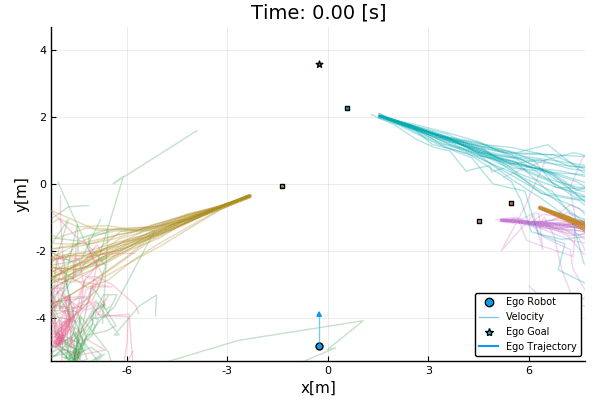

In [12]:
make_gif(result, 0.02, 20, (600, 400), 
            7, :bottomright,
            (-3. + -5.263534, 13. + -5.314636), (0. + -5.263534, 10. + -5.314636), 
            5., "drc_data_trajectron.gif")

In [13]:
save("2_1_data_trajectron.jld2", "result", result)

Error encountered while save File{DataFormat{:JLD2}, String}("2_1_data_trajectron.jld2").

Fatal error:


CapturedException: type DataType has no field mutable
Stacktrace:
  [1] getproperty
    @ ./Base.jl:33 [inlined]
  [2] hasfielddata(T::Any, encounteredtypes::Vector{DataType})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:24
  [3] hasdata(T::DataType, encounteredtypes::Vector{DataType})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:32
  [4] hasdata
    @ ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:30 [inlined]
  [5] odr(#unused#::Type{Main.DistributionallyRobust.DRCEvaluationResult})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:563
  [6] objodr
    @ ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:109 [inlined]
  [7] write_dataset
    @ ~/.julia/packages/JLD2/qncOK/src/datasets.jl:541 [inlined]
  [8] write(g::JLD2.Group{JLD2.JLDFile{JLD2.MmapIO}}, name::String, obj::Main.DistributionallyRobust.DRCEvaluationResult, wsession::JLD2.JLDWriteSession{Dict{UInt64, JLD2.RelOffset}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/groups.jl:119
  [9] write(f::JLD2.JLDFile{JLD2.MmapIO}, name::String, obj::Main.DistributionallyRobust.DRCEvaluationResult, wsession::JLD2.JLDWriteSession{Dict{UInt64, JLD2.RelOffset}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/JLD2.jl:347
 [10] (::JLD2.var"#62#63"{String, Main.DistributionallyRobust.DRCEvaluationResult, Tuple{}})(file::JLD2.JLDFile{JLD2.MmapIO})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/fileio.jl:23
 [11] jldopen(::JLD2.var"#62#63"{String, Main.DistributionallyRobust.DRCEvaluationResult, Tuple{}}, ::String, ::Vararg{String}; kws::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/loadsave.jl:4
 [12] jldopen(::Function, ::String, ::String)
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/loadsave.jl:1
 [13] save(::File{DataFormat{:JLD2}, String}, ::String, ::Main.DistributionallyRobust.DRCEvaluationResult; kwargs::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/fileio.jl:21
 [14] save(::File{DataFormat{:JLD2}, String}, ::String, ::Main.DistributionallyRobust.DRCEvaluationResult)
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/fileio.jl:17
 [15] invokelatest(::Any, ::Any, ::Vararg{Any}; kwargs::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ Base ./essentials.jl:729
 [16] invokelatest(::Any, ::Any, ::Vararg{Any})
    @ Base ./essentials.jl:726
 [17] action(::Symbol, ::Vector{Union{Base.PkgId, Module}}, ::Formatted, ::String, ::Vararg{Any}; options::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:219
 [18] action(::Symbol, ::Vector{Union{Base.PkgId, Module}}, ::Formatted, ::String, ::Main.DistributionallyRobust.DRCEvaluationResult)
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:196
 [19] action(::Symbol, ::Vector{Union{Base.PkgId, Module}}, ::Symbol, ::String, ::String, ::Vararg{Any}; options::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:185
 [20] action
    @ ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:185 [inlined]
 [21] #save#20
    @ ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:129 [inlined]
 [22] save(::String, ::String, ::Main.DistributionallyRobust.DRCEvaluationResult)
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:125
 [23] top-level scope
    @ ~/DRC_Project/DRC_Trajectron/notebook/Eval_Example_9_DRC_Data_Trajectron.ipynb:1